# Task
Analyze the "Mall_Customers.csv" dataset to segment customers based on 'Annual Income (k$)' and 'Spending Score (1-100)' using K-Means clustering. Scale the features, determine the optimal number of clusters, apply K-Means, and visualize the resulting clusters.

## Load the data

### Subtask:
Load the `Mall_Customers.csv` dataset into a pandas DataFrame.


In [16]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


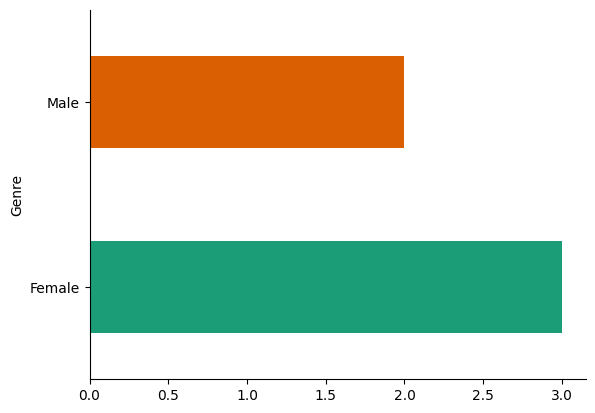

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Select relevant features

### Subtask:
Extract the 'Annual Income (k$)' and 'Spending Score (1-100)' columns for clustering.


In [18]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
display(X.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Scale the features

### Subtask:
Scale the selected features using StandardScaler to ensure they have similar ranges.


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
display(X_scaled.head())

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Determine optimal number of clusters

### Subtask:
Use the elbow method or silhouette score to find the optimal number of clusters for K-Means.


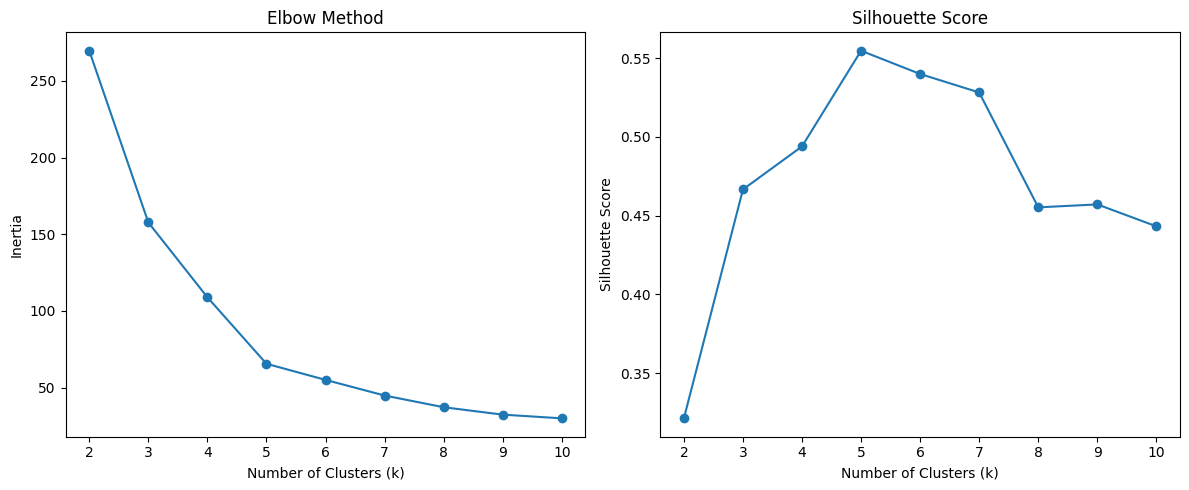

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)

plt.tight_layout()
plt.show()

## Apply k-means clustering

### Subtask:
Apply K-Means clustering with the optimal number of clusters to the scaled data.


In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df['cluster_label'] = kmeans.predict(X_scaled)
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Visualize the clusters

### Subtask:
Visualize the clusters using a 2D scatter plot of the original (unscaled) features, colored by the cluster labels.


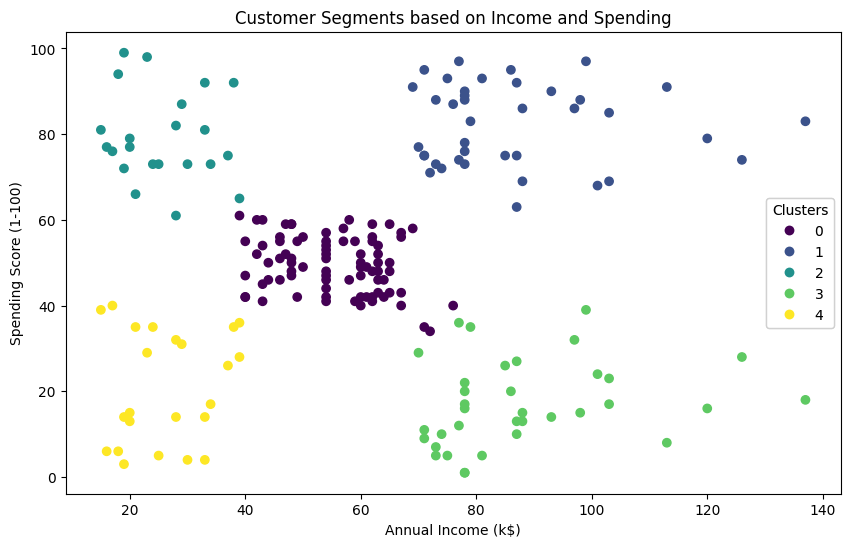

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster_label'], cmap='viridis', label=df['cluster_label'])
plt.title('Customer Segments based on Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The optimal number of clusters for segmentation based on 'Annual Income (k\$)' and 'Spending Score (1-100)' was determined to be 5, as indicated by both the elbow method and the silhouette score.
*   After applying K-Means clustering with 5 clusters, the resulting cluster labels were successfully added to the original dataset.
*   The visualization of the clusters on the original feature scale ['Annual Income (k\$)' and 'Spending Score (1-100)'] shows distinct groupings of customers with varying income and spending patterns.

